In [38]:
from sentence_transformers import SentenceTransformer
from dataset.polyvore_text import text_data_list
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
data_dir = '/home/abdelrahman/fashion-matching/data/polyvore_outfits'
text_test_dataset = text_data_list(data_dir=data_dir, polyvore_split='nondisjoint',dataset_type='test')

100%|██████████| 47854/47854 [00:00<00:00, 409334.33it/s]


In [4]:
model = SentenceTransformer('./weights/text_model/one_snet_sbert-128dim-model')

In [16]:
X = np.array([model.encode(sample.texts) for sample in text_test_dataset])
y = np.array([sample.label for sample in text_test_dataset])

In [17]:
X.shape, y.shape

((47854, 1, 128), (47854,))

In [20]:
X = X.reshape(X.shape[0], -1)

In [24]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=25, n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(X)

In [43]:
labels = ['accessories', 'all-body', 'bags', 'bottoms', 'hats', 'jewellery', 'outerwear', 'scarves', 'shoes', 'sunglasses', 'tops']

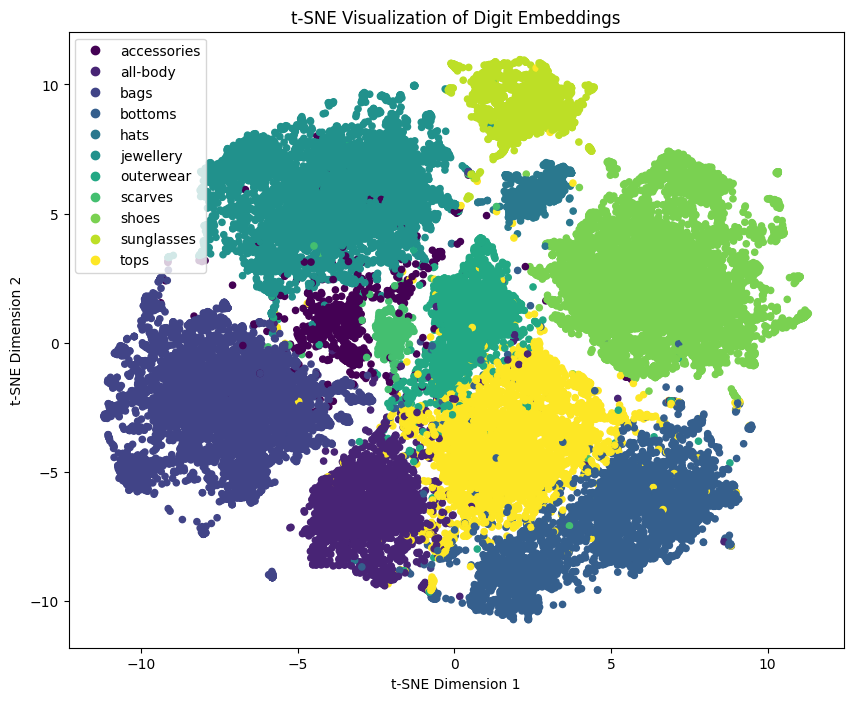

In [44]:
# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=20)
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.title("t-SNE Visualization of Digit Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()